In [1]:
%matplotlib inline

In [41]:
import warnings
import datetime

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

<h1>
   <font size="5" face = "Times New Roma" color='#270336'>
     The softmax function.Optimization problem in Cross-entropy Loss
   </font> 
 </h1>

<h2>
  <p>
    <a href =   "https://github.com/daodavid" > 
       <img src="https://cdn.thenewstack.io/media/2014/12/github-octocat.png" align="left" width="120"  alt="daodavid" >
    </a>
    <font face = "Times New Roma" size="4"  color='#270336'>
        author: daodeiv (David Stankov) 
    </font>
</p>      
</h2>   


<br> <br>
<h6>
  <font size="4" face = "Times New Roma" color='#3f134f' > 
    <ul style="margin-left: 30px">
      <!--<li><a href='#abstract'>Abstract </a> </li> <br> -->
      <!--<li><a href='#int-1'>Introduction </a> </li><br> -->
      <li><a href='#deff_softmax'>Softmaxt definitions and  how it works.</a> </li><br>
      <li><a href='#cross_entropy'>Cross-entropy Loss and Gradient Descent</a> </li><br>  
      <li><a href='#optimization'>Minimization of Cross-entropy Loss and derivates of Gradient Descent </a> </li><br>
       <li><a href='#gradient'>Implementation of Gradient Descent Algotihm </a> </li><br> 
      <li><a href='#deff'>Experimentations related to a count of iterations and learning rate</a> </li><br>     
        
</ul>    
 </font>
  </h6>
  

<br> <br>
<font face = "Times New Roma" size="4.5" id="abstract"  color='#270336' style="margin-right: 45px; margin-left: 45px" >
  &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; This paper contains a mathematical proof and implementation of Gradient Descent expression used as optimization alogithm in Cross-entropy Loss. We will use the Cross-entropy Loss or so-called Softmax Loss as an error function in the process of fitting estimator parameters(weights) in Softmax function. This notebook is focused on the mathematics behind softmax regression rather than its application in multi-class classification.In addition, there is an example of training data in order to represent a litle of practical part of Softmax regression.
  </font> <br>


<h5 id="int-1" style="margin-right: 45px; margin-left: 45px">
<font face="Times New Roma" size="4" color='#270336' >
      &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;The Softmax turns arbitrary real values into probabilities, by using 
      exponentianal function. It could be considered a generalization of the sigmoid function that we can use for multi-class classification,but the softmax function has its place in many fields of science as statistical physics(Gibbs distributions), quantum statistic, Logistic regression, and Neural networks. Softmax is much attractive in classification problems since it has a simple implementation and gives good results.
    </font>
</h5>      

  

<h6> 
    <font size="3" color='#270336' face = "Times New Roma" >
        &nbsp;&nbsp; Let to generate our training data : <br>
</font>    
</h6>  
  

In [3]:
#generate  records refer to tractor label with random physical size between [4,5] 
tractor_dataframe= pd.DataFrame(data=np.random.random((30, 3))+3,columns = ['x_size','y_size','z_size'])
tractor_dataframe['label'] =pd.DataFrame( np.full((1,30 ), 'Tractor').T)

#generate  records refer to car label with random physical size between [1,2]  
car_dataframe= pd.DataFrame(data=np.random.random((30, 3)) + 1,columns = ['x_size','y_size','z_size'])
car_dataframe['label'] =pd.DataFrame( np.full((1,30 ), 'Car').T)

#generate  records refer to car label with random physical size between [2,3]  
bus_dataframe= pd.DataFrame(data=np.random.random((30, 3))+2,columns = ['x_size','y_size','z_size'])
bus_dataframe['label'] =pd.DataFrame( np.full((1,30 ), 'Bus').T)

# joint each data frame into  one
original_data = tractor_dataframe.append(bus_dataframe).append(car_dataframe)
data = pd.get_dummies(original_data) 
data

,x_size,y_size,z_size,label_Bus,label_Car,label_Tractor
0,3.465922,3.580129,3.569248,0,0,1
1,3.825118,3.914742,3.858549,0,0,1
2,3.774173,3.243943,3.314252,0,0,1
3,3.847160,3.117052,3.449495,0,0,1
4,3.156099,3.176334,3.505233,0,0,1
...,...,...,...,...,...,...
25,1.862537,1.501387,1.477440,0,1,0
26,1.513235,1.221818,1.826166,0,1,0
27,1.081103,1.657332,1.894008,0,1,0
28,1.917399,1.070917,1.712536,0,1,0


In [4]:
original_data['label'].unique()

array(['Tractor', 'Bus', 'Car'], dtype=object)


<font size="4" color='#270336' face = "Times New Roma">
&nbsp;&nbsp;The class (target)  values can be Car, Bus, Tractor. In our working data, the label values are expressed as one-hot encoding variables or so-called dummies. This numerical representation of non-numerical data just allows mathematical manipulation over them.
</font>    
<br> 


<h6>
     <font size="3" color='#270336' face = "Times New Roma" >
        &nbsp;&nbsp; Let to visualize the data  using  Scatter plot :  
</font>    
</h6>  

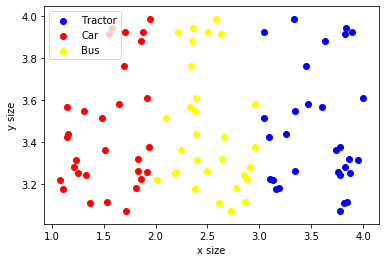

In [5]:
plt.scatter(tractor_dataframe['x_size'],tractor_dataframe['y_size'],label='Tractor',color='blue')
plt.scatter(car_dataframe['x_size'],tractor_dataframe['y_size'],label='Car',color='red')
plt.scatter(bus_dataframe['x_size'],tractor_dataframe['y_size'],label='Bus',color='yellow')
plt.xlabel('x size')
plt.ylabel('y size')
plt.legend()

In [6]:
x_train = np.array(data.drop(['label_Bus','label_Car','label_Tractor'], axis = 1)) # gets the target label variables
y_train = np.array(data[['label_Bus','label_Car','label_Tractor']]) # gets feature variables 
X_train, X_test, y_train, y_test = train_test_split(x_train,y_train, test_size=0.33, random_state=42) #separats into test and train samples 

print('shape of x train (M, N)', X_train.shape)
print('shape of y label (M, K)', y_train.shape )
type(y_train)

shape of x train (M, N) (60, 3)
shape of y label (M, K) (60, 3)


numpy.ndarray


<br>
<font size="3" color='#270336' face = "Times New Roma">  
The dataset is split to $X_{M\times N}$ feature matrix and $Y_{M\times K}$ target one.Where $M$ is the number of feature vectors match the rows of  dataset. $N$ is the number of components(feature) match the columns in dataset.They are also called predictors or attributes.$K$ is equal to the number of components or class labels  of target vector.
   In our dataset  $M = 60$, $N=3$ and K=3.<br>
    ~One example, $y_{32}=1$ that means the record 3 $x^{3} $ belongs to class 2(Car). <br>
    ~Given our data, the softmax function will be written as  : <br>
</font>



<h5 style="margin-right: 5px; margin-left: 5px">
<font face="Times New Roma" size="3" color='#270336' >
     Note the index convetions !!! When we write $Q_{lh}$ or $q_{ih}$ we mean the element of matrix $Q_{m\times n}$ where $l$ is row $h$ is column.When we write $Q^{i}$  or sometimes $Q_{i}$ we  will assume as vector row  $Q^{i}=[q_{i1},q_{i2},...q_{in}]\in Q_{m\times n}$
</font>
</h5>      
 

<font size="1" id="deff_softmax">... </font> 



<br> <br>
<font  size="4" color='#270336' face = "Times New Roma">
  &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; The softmax function $\sigma: \; \Re^k \; \rightarrow \; \Re^k $  could be define by formula :
</font>    


<font size="5" color='#4a3e20'>
    $$ \sigma_{softmax (W,b_j,X^{i})_{ij}}=\frac{e^{ \sum_p x_{ip} w_{pj} + b_j}}{\sum_j^k e^{ \sum_p x_{ip} w_{pj} + b_j}} $$ 
</font>   





<h5 style="margin-left: 80px">
<font size="3" color='#270336' face = "Times New Roma">
  if we write :
</font>    
</h5>

<font size="4" color='#4a3e20'>  
     $$\; \; z_{ij} = \sum_p x_{ip} w_{jp} + b_j $$
</font>  

<h5 style="margin-left: 80px">
<font size="3" color='#270336' face = "Times New Roma">
 We can rewrite the eq. as  :
</font> 
</h5>    


 <font size="5" id="deff_softmax" color='#4a3e20'>
    $$ (1) \;\; \sigma_{softmax}(Z)_{ij} =\frac {e^{z_{ij}} }{ \sum_i^k e^{z_{ik}} } $$ 
  </font>
  <br>

<font size="3" color='#270336' face = "Times New Roma" > 
  The softmax function  takes as an input a vector $\vec Z_i$ with $K$ number of component $z_{c1},...,{ck}$, and normalized it into  a  probability distribution $p_{i}$ consisting of  $K$ number of probabilities  $p_{i1},...,{ik}$ proportional to exponentials of input values.That is, prior to applying softmax function some vector components could be negative or greater than one and  might not sum up to 1.
Furthermore more the larger input components correspond to larger probabilities and $\sum_j p_{ij}=1$, $w_{jp}$ are the wights or estimators  $w_{pj}\in W^{K\times N}$ In matrix  $W^{K\times N}$ $K$ coresponds to number of class labels and  $N$ coresponds to number of atrribute(feature) of training data.$B = \vec B$ is bais term with component coresponds to class labels. 
 </font> 


<br>
<font size="4" color='#270336'  face = "Times New Roma">
    According to our data set, we can write the folowing expression.
  </font>

   

 <font size="3" color='#4a3e20' >  <br> 
      &nbsp;&nbsp;&nbsp;&nbsp;   $ W= \begin{bmatrix} weight^1\rightarrow class \; 1(bus) \\ weight^2\rightarrow class\;  2(car) \;   \\ weight^{3}\rightarrow class \;3(tractor) \;  \end{bmatrix} =
    \begin{bmatrix} \vec W^1 \\  \vec W^2\  \\ \vec W^3  \end{bmatrix} =\begin{bmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \\ w_{31} & w_{32} & w_{33} \end{bmatrix}  $ &nbsp;&nbsp;&nbsp;&nbsp;    $ B= \begin{bmatrix}  b_1 \\  b_2\  \\  b_3  \end{bmatrix}\;\;\;$
   </font>
</h7>    
<h5 style="margin-right: 45px; margin-left: 45px">
<font size="2" color='#270336' face = "Times New Roma">
  &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; vector $\vec W^1=[w_{11},w_{12},w_{13}]=w^{1j}$ is estimator vecotor for class 1 (bus), and $w_{12}$ is related to $x_{m2}$ attribute(predictor), written in matrix form : :
</font>   
</h5>  

<br>
<font size="4" color='#270336'  face = "Times New Roma">
     &nbsp;&nbsp; and the $Z$ in matrix is written as : <br>  <br>
    &nbsp;&nbsp;&nbsp;&nbsp;  $Z = XW^T$ 
 </font>
  <font size="3" color='#4a3e20' >
  &nbsp;&nbsp;&nbsp;&nbsp;  $Z = 
    \begin{bmatrix} x_{11} &  x_{12} & x_{13} \\  x_{21} &  x_{22} & x_{23} \\ ... & ... & ... \\ x_{n1} &  x_{n2} & x_{n3} \end{bmatrix} \times \begin{bmatrix} w_{11} & w_{21} & w_{31}  \\ w_{12} & w_{22} & w_{32} \\  w_{13} & w_{23} & w_{33}\end{bmatrix} + \begin{bmatrix}  b_1 \\  b_2\  \\  b_3  \end{bmatrix}  =   \begin{bmatrix} z_{11} &  z_{12} & z_{13} \\  z_{21} &  z_{32} & z_{33} \\ ... & ... & ...  \\ z_{n1} &  z_{n2} & z_{n3}  \end{bmatrix} $ <br>   
   </font>
</h1>   


<h7>
<font size="3" color='#270336'>  
   &nbsp;&nbsp; The softmax function computes the probability that a training example $X^{(i)}$  belongs to class $y^{j}$ given 
    the weight  matrix $W$ and bias $\vec b$ . <br> 
    So we compute the probability : <br>
  </font>
  <font size="3" color='#4a3e20' >
      $$p_{ij}=P(y^{j} | x^{(i)};W,b_j) = \sigma_{softmax (z)_{ij}}=\frac{e^{z_{ij}}}{\sum_p^N e^{z_{ip}}} $$
   </font>   
</h7>    

<font size="3" color='#270336' > 
    &nbsp;&nbsp; In a matrix for all $P_{ij}$ given our data $Y = [y^1 -tractor,y^2 -car,y^3- bus]$
 </font> <br>   

<h1>
<font size="3" color='#4a3e20' >
   $ P = \begin{bmatrix} p(y^{1} |x^{1} ; W )_{11} &  p(y^{2} |x^{1} ; W )_{12}  &  p(y^{3}  |x^{1} ; W )_{13} 
        \\ ... &  ...  & ...
        \\ P(y^{1} |x^{m} ; W ) &  P(y^{2}  |x^{m} ; W )  & P(y^{3}  |x^{m} ; W )
        \end{bmatrix} = 
        \begin{bmatrix} \frac{e^{z_{11}}}{\sum_{1j}e^{z_{1j}}} & \frac{e^{z_{12}}}{\sum_{1j}e^{z_{1j}}} & \frac{e^{z_{13}}}{\sum_{1j}e^{z_{1j}}} 
        \\   \\ ... & ... & ...  \\
        \\    \frac{e^{k_{n1}}}{\sum_{j}^3e^{z_{nj}}} & \frac{e^{z_{n2}}}{\sum_{j}^3e^{z_{nj}}} & \frac{e^{z_{n3}}}{\sum_{j}^3e^{z_{nj}}}\end{bmatrix} $
</h1>        

<font size="3" color='#270336' face = "Times New Roma"> 
  for example, the probability record one $x^1$ from dataset to belongs to class  $y_2$ (car) we be calculated as:
  </font>
  <br> <br> 
  <font size="3" color='#270336'>
     $$p_{12} =P(y=2 |x^{1};\; W ) = \frac{ e^{ ^{z_{12}} } }{ \sum_p^3 e^{z_{1p}}}=\frac{ e^{ (^{\sum_v^3 x_{1v}.w_{vj} + b_v }} )}{ \sum_p^3 e^{ ^ ({\sum_v^3 x_{1v}.w_{2v}} + b_2})}$$
  </font>
  <h5 style="margin-right: 45px; margin-left: 45px">
<font size="3" color='#270336' face = "Times New Roma">
    Due to denominator $\sum_v^3 x_{1v}.w_{2v} + b_2$ always the  $p_{12}=\frac{e^{z_{ij}}}{\sum_l^k e^{z_{il}}}\in [0,1]$
     and for all $p_{ij} $ as well.
    </font>
<h5>    
 

<font size="4" color='#270336'  face = "Times New Roma">
    &nbsp; Let to see how the softmax function  can be applied concretely in our training dataset :
             First, let to define a weight matrix $W$ and bias $\vec b$ <br> <br>
 <font>  
   <font size="3" color='#4a3e20' >
   &nbsp;&nbsp;    $W = \begin{bmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \\ w_{31} & w_{32} & w_{33}                      \end{bmatrix} 
                   =  \begin{bmatrix} 0.75776811 & 0.6690284 & -0.02646755 \\
                                     -2.94775864 &  -3.06439323 & -2.14043833\\
                                      2.18999053 & 2.39536483 &  2.16690588 \end{bmatrix}$
     &nbsp;&nbsp; $B = \begin{bmatrix}  b_1 \\  b_2\  \\  b_3  \end{bmatrix} = \begin{bmatrix}  -0.15425504 \\ 18.81781451 \\ -18.66355947 \end{bmatrix} $
</font>     

       

<h5 style="margin-right: 45px; margin-left: 45px">
<font size="3" color='#270336' face = "Times New Roma">
 I've prepared weight vector $W$ and bias $B$ in advance, how? We will see later.
</font>    
</h5>

In [7]:
W = np.array([[ 0.75776811,  0.6690284 , -0.02646755],
              [-2.94775864, -3.06439323, -2.14043833],
              [ 2.18999053 , 2.39536483,  2.16690588]]) # define a weight matrix

B = intercept = np.array([ -0.15425504 , 18.81781451, -18.66355947])  #bias vector (intercept) 

<h5 style="margin-right: 45px; margin-left: 45px">
<font size="3" color='#270336' face = "Times New Roma">
        &nbsp;&nbsp; Let to implement softmax function: <br>
</font>    
</h5>  

In [46]:
def softmax(X, W, B):
    '''
    softmax function  
    takes :
    X = training data
    W =  weight matrix
    b = bias vector (intercept) 
    return :
      softmax for every z unit e^{k_ij}/Sum(e^{k_i1}+e^{k_i2}+e^{k_i3})
    '''
    #dot product between X_data matrix  and tranposed Weight_ matrix added to Bias  gives matrix each z_ij
    Z = X.dot(W.T)+B 
    
    #return matrix cosist of exponentials Z input net
    exp_z = np.exp(X.dot(W.T)+B)
    
    #array contains sum  of every row  (e^z_{ik})
    sums=np.sum(exp_z, axis=1) 
    
    #return softmax(Z)_{ij}
    return (exp_z.T/sums).T 


In [9]:
print('original data label Y :  ')
print(y_train[1:10])
print('')
print("predicted data label Y' :")
print(np.around(softmax(X_train,W,intercept)[1:10],2))

original data label Y :  
[[0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]]

predicted data label Y' :
[[0.   1.   0.  ]
 [0.55 0.   0.45]
 [0.99 0.   0.01]
 [0.96 0.04 0.  ]
 [0.61 0.   0.39]
 [0.98 0.01 0.01]
 [0.98 0.01 0.01]
 [0.41 0.   0.59]
 [0.   1.   0.  ]]


<font  size="3" color='#270336'  face = "Times New Roma">
  From $Y'$ output let to consider the first row : <br> <br>
            $Y'_{11} = 0.01 \rightarrow  $ has  0.1% chance that $x^{1}$ belongs to class 1(BUS) <br> 
            $Y'_{12} = 0.98 \rightarrow  $ has 98% chance that row $x^{1}$ belongs to class 2(CAR) <br> 
            $Y'_{13} = 0.01 \rightarrow  $ has 0.1% chance that  $x^{1}$belongs to class 3(TRACTOR) <br> 
            From above considering we could do a conclusion the record $X_1$ belongs to class Car because has the 90% chance and it is the largest one. <br> 
      If we compare $Y'_{ij}$ to  target $Y_{ij}$  we will notice that our prediction has 100% accuracy.       
</font>



       

<h6> 
  <font size="3" color='#270336' face = "Times New Roma" >
     &nbsp;&nbsp; &nbsp;&nbsp;How have I  found the weight matrix $W$ and bias $B$ ? 
</font>  
 </h6>

<font size="3" color='#270336'  face = "Times New Roma">
Just I used the <mark>LogisticRegression</mark> from <mark>scikit-learn</mark> and took the coefficients, but our purpose is to understand the way   of finding the weight $W$ and bias $\vec b$ . 
</font>

<font size="1" id="cross_entropy">... </font> 
<br>

<br>
<font size="4" color='#270336' face = "Times New Roma">
      &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;In order to find the $W$ matrix we will introduce the error function, wich we minimaize.The error function 
        wich we will use in Softmax regression is called Cross-Entropy Loss or Sofmax Loss  defined as: 
 <font>   

<br> <br>   
  <font size="5" color='#4a3e20' >
    $$ (2)\;\; L(W,b)=-\sum_i^m\sum_j^k y_{ij} \log (p(Z)_{ij})$$ <br> <br>  
  </font>
 <h5 style="margin-right: 45px; margin-left: 45px">
<font size="2" color='#270336' face = "Times New Roma">
  &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    Where $m$ is a count of records , $k$ is  count of classes $y_{ij}$ is label values , $p_{ij}=\phi_{softmax}(Z)_{ij}$ are  $Y'_{ij}$ predicited class  values, $W$ is weight matrix and $b$ bias. 
  </font>   
</h5>   

<font size="4" color='#270336' face = "Times New Roma">
    Why will we use these Loss function is a question which brings by itself much reading and investigations.Here <a href='https://daodavid.github.io/Machine-Learning/pages/html/ML/logistic-regression/Cross-entropy%20function.Investigation%20and%20gradient%20descent.html'>cross-entropy</a> there are some examples and investigations related to Minimum cross-entropy used in  Sigmoid regression. That can give you some intuitions.<br>
Out goal is to mimimaize the eq.(2) in order to find best estimators   $w_{ij}\in W$ and $b_j$ given 
 a training data $X$  and a label data $Y$. <br>
    To do that we will apply well known Gradient descent as a optimization model. 
    Note that, the eq.(2) is the function of all weights $w_{ij}$, bias $b_j$ all training data X and label data Y.        
 </font>

  

<font size="4" color='#270336' face = "Times New Roma"> 
  &nbsp;&nbsp;  Gradient descent is defined as  : 
</font>
<br>    
<font size="3" color='#4a3e20' >   
    $$ \;  \; \;  \; \; \; \;\begin{matrix} w_{ij} = w_{ij} - \lambda \nabla w_{ij}L(W,b) \\  \\ b_{j} = b_j - \lambda\nabla b_{j}L(W,b)
       \end{matrix} $$ 
</font>

<h5 >
<font size="4" color='#270336' face = "Times New Roma">
where  $\lambda$ is learning rate or step size  . 
  </font>   
</h5>   


<h7>
    <font size="3" color='#270336' face = "Times New Roma">
&nbsp;&nbsp;  Plug in eq.(2) in  gradient descent  : 
</font>
    <br>
    <font size="4" color='#4a3e20' >   
     $$(3) \;  \; \;  \; \; \; 
   \begin{matrix} \nabla w_{ij}L(W,b)   &=  -\frac{\partial}{\partial w_{ij}}\Big(\sum_k^m\sum_n^n y_{mn} \log {p_{mn}}\Big) \\  \\
     \nabla b_{j}L(W,b) & =- \frac{\partial}{\partial b_{j}}\Big(\sum_k^m\sum_n^n y_{mn} \log{p_{mn}}\Big)
       \end{matrix} $$
</font>

<font size="3" color='#270336' face = "Times New Roma"> 
   Before we take up  with  $\nabla w_{ij}L(W,b)$. We gonna introduce some math technics which will make our work easier.
   <br>
   For simplicity in the summation process of indices, we will introduce a <a href='http://physics.csusb.edu/~prenteln/notes/vc_notes.pdf'>Kronecker symbol</a> .<br>   <br>
</font>
<font size="3" color='#4a3e20' >  
       $$\delta_{ij} =    
         \begin{equation}
   \begin{Bmatrix} 
   1 & if \; i=j  \\
   0 & if \; i\ne j  
    \end{Bmatrix} 
\end{equation}$$
  <br><br>
          $$ \delta_{ij} = \begin{bmatrix} 1 & 0 & 0  \\ 0 & 1 & 0 \\  0 & 0 & 1 \end{bmatrix}$$
   </font>
<font size="2" color='#270336' face = "Times New Roma">  
   In many places in the coming sum operations over indexes we will miss the $\sum$ symbol, just it will be avoided(hidden) according to the .<a href='https://en.wikipedia.org/wiki/Einstein_notation'>Einstein summation convention</a> .<br>
       For example, the equation. 
</font>


<h7>
    <font size="2" color='#270336'>  
   $$z_{ij} = \sum_p^3 x_{ip} w_{jp} + b_j $$ 
</font>
<font size="3" color='#270336' face = "Times New Roma">  
     by applying the  Enstein convetion we could rewrite it as : <br>
</font>
</h7>

<h7>
    <font size="2" color='#270336'> 
   $$z_{ij} = x_{ip} w_{jp} + b_j$$  
</font>
<font size="3" color='#270336' face = "Times New Roma">   
     The sign $\sum_p^3$ is miss.The sumation over p  is implied(by default) because p is repeated twice.Every time when there are repeatable indices that is the indicator for exist of $\sum$  which is just missing(The sum sign  is not written).
</font>
</h7>


<h5 >
<font size="3" color='#270336' face = "Times New Roma">
 &nbsp;&nbsp; Now we gonna to resolve the eqs.(3) :  
  </font>   
</h5>   


<font size="1" id="optimization">... </font> 
<br>

<br>
<font size="4" color='#270336' face = "Times New Roma">
      &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;In order to minimize the entropy of data, we must to take up with minimizatin of Cross entropy loss respect to $w_{ij}$.The cross-etropy Loss is a function of all feature vectors $X_{M\times N}$ ,all labels $X_{M\times K}$ , weight $W_{K\times N}$ and bias $B_K$ <br> $L = L(X,T,W,B)$

<h1>
 <font size="4" color='#4a3e20' >    
 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;$\frac{\partial L}{\partial w_{ij}}=-\frac{\partial}{\partial w_{ij}}\Big(\sum_k\sum_n y_{mn} \log {p_{mn}}\Big)$
 $=\sum_k\sum_n y_{mn}\frac{\partial \log {p_{mn}}}{\partial w_{ij}}$ 
  </font>
</h1>     

<h1>
 <font size="4" color='#4a3e20' >    
 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;$=-\sum_m\sum_n\frac{y_{mn}}{p_{mn}}\frac{\partial  p_{mn}}{\partial w_{ij}} $ 
            $=\sum_m\sum_n \frac{y_{mn}}{p_{mn}}\frac{\partial  p_{mn}}{\partial z_{vp}}\frac{\partial  z_{vp}}{\partial w_{ij}} $
 </font>
</h1> 

<h5 style="margin-right: 50px; margin-left: 160px">
<font face="Times New Roma" size="3" color='#270336' >
since  $z_{vp} = f(w_{pi}) \Rightarrow \frac{\partial  z_{vp}}{\partial w_{ij}} = 0\;$ if $\; p\ne i$ then  we can  write $ \frac{\partial  z_{vp}}{\partial w_{ij}}=\delta_{pi}\frac{\partial  z_{vp}}{\partial w_{ij}}$ 
      and  $p_{mn} = f(z_{mv}) \Rightarrow \frac{\partial  z_{vp}}{\partial w_{ij}} = 0$ if $ m\ne v $ then  we  can  write  $\frac{\partial p_{mn}}{\partial z_{vp}}=\delta_{mv}\frac{\partial  p_{mn}}{\partial z_{vp}}  $ 
   plug in our equation we will achieve 
    </font>
</h5>    

<h1>
 <font size="4" color='#4a3e20' >  
     &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;$ =-\sum_m\sum_n \frac{y_{mn}}{p_{mn}}\delta_{mv}\frac{\partial  p_{mn}}{\partial  z_{vp}} \delta_{pi}\frac{\partial  z_{vp}}{\partial w_{ij}} $
    </font>
</h1>     

<h5 style="margin-right: 50px; margin-left: 160px">
<font face="Times New Roma" size="3" color='#270336' >
    using common Kronicker $\delta$ proprties   
  </font>
</h5>    


<h1>
 <font size="4" color='#4a3e20' >  
     &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;$=-\sum_m\sum_n \frac{y_{mn}}{p_{mn}}\delta_{mm}\delta_{ii}\frac{\partial  p_{mn}}{\partial z_{mi}}\frac{\partial  z_{mi}}{\partial w_{ij}} $ $=-\sum_m\sum_n \frac{y_{mn}}{p_{mn}}\frac{\partial  p_{mn}}{\partial z_{mi}}\frac{\partial  z_{mi}}{\partial w_{ij}} $ 
    </font>
</h1>     

<font size="4" color='#270336' face = "Times New Roma">
    We've successfully reduced the count of sum operations, using Einstein's convention and Kronecker symbol and
    achieved
</font>    

<h1>
 <font size="4" color='#4a3e20' >    
 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;$\frac{\partial L}{\partial w_{ij}}=-\sum_m\sum_n \frac{y_{mn}}{p_{mn}}\frac{\partial  p_{mn}}{\partial z_{mi}}\frac{\partial  z_{mi}}{\partial w_{ij}}$ 
  </font>
</h1>     

<h7>
    <font size="3" color='#270336'>
  Let to focus on terms $\frac{\partial  p_{mn}}{\partial z_{mi}}$ and $\frac{\partial  z_{mi}}{\partial w_{ij}}$
    </font>
</h7>  

<h1>
 <font size="4" color='#4a3e20' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
     $\frac{\partial  p_{mn}} {\partial z_{mi}}=\frac{\partial\frac { e^{z_{mn}} }{ \sum_ke^{z_{mk}}} }{\partial z_{mi}}$
     $=\frac{1}{(\sum_ke^{z_{mk}})^2}\times \Big(\frac{\partial e^{z_{mn}} }{\partial z_{mi}}\times(\sum_ke^{z_{mk}}) - e^{z_{mn}}\times\frac{\partial (\sum_ke^{z_{mk}})}{\partial z_{mi}}  \Big)$
   </font>
</h1>

<h1>
 <font size="4" color='#4a3e20' >  
     &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
     $=\frac{e^{z_{mn}}\times\frac{\partial z_{mn}}{\partial z_{mi}}}{\sum_ke^{z_{mk}}} - \frac{e^{z_{mn}}}{\sum_ke^{z_{mk}}}\times\frac{ \sum_k e^{z_{mk}} \frac{ \partial z_{mk}}{\partial z_{mi}}}  {\sum_ke^{z_{mk}}}$
   </font>
</h1>   

<h5 style="margin-right: 50px; margin-left: 160px">
<font face="Times New Roma" size="3" color='#270336' >
      since $\frac{\partial z_{mk}}{\partial z_{mi}}=0$ if $k\ne i\;\frac{\partial z_{mk}}{\partial z_{mi}}=1\;ifk = i\;\Rightarrow \frac{\partial z_{mk}}{\partial z_{mi}}=\delta_{ki} $ plug in we achieve
  </font>
</h5>    

<h1>
 <font size="4" color='#4a3e20' >  
     &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
     $=\frac{e^{z_{mn}}\times \delta_{ni} }{\sum_ke^{z_{mk}}} - \frac{e^{z_{mn}}}{\sum_ke^{z_{mk}}}\times\frac{ \sum_k e^{z_{mk}}\delta_{ki}}  {\sum_ke^{z_{mk}}}$ 
      $=\frac{e^{z_{mn}}\times \delta_{ni} }{\sum_k e^{z_{mk}}} - \frac{e^{z_{mn}}}{\sum_ke^{z_{mk}}}\times\frac{ \sum_k e^{z_{mk}}\delta_{ki}}  {\sum_ke^{z_{mk}}}$ 
   </font>
</h1>

<h1>
 <font size="4" color='#4a3e20' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
      $=\frac{e^{z_{mn}}\times \delta_{ni} }{\sum_ke^{z_{mk}}} - \frac{e^{z_{mn}}}{\sum_ke^{z_{mk}}}\times\frac{ \sum_k e^{z_{mi}}\delta_{ii}}  {\sum_ke^{z_{mk}}}$ 
          $=\frac{e^{z_{mn}}\times \delta_{ni} }{\sum_ke^{z_{mk}}} - \frac{e^{z_{mn}}}{\sum_ke^{z_{mk}}}\times \frac{ e^{z_{mi}}}{\sum_ke^{z_{mk}}}$ 
   </font>
</h1>

<h5 style="margin-right: 50px; margin-left: 160px">
<font face="Times New Roma" size="3" color='#270336' >
from eq.(1)  $\Rightarrow$ $\frac{ e^{z_{mn}} }{ \sum_k e^{z_{mk} } }=p_{mn}$ and $\frac{ e^{z_{mi}} }{ \sum_k e^{z_{mk} } }=p_{mi}$  when we apply it, we will achieve 
 </font>
</h5>   

<h1>
 <font size="4" color='#4a3e20' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
       $=p_{mn}\times \delta_{ni} - p_{mn}\times p_{mn}p_{mi}$ <br>
        &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
          $=p_{mn}(\delta_{ni} -  p_{mi})$ 
   </font>
</h1>

<font size="4" color='#270336' face = "Times New Roma">
 for term  $\frac{\partial  p_{mn}} {\partial z_{mi}}$ we reach :
</font>
<br> <br>
<font size="4" color='#4a3e20' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
     $$4) \; \; \; \; \frac{\partial  p_{mn}} {\partial z_{mi}}=p_{mn}(\delta_{ni} -  p_{mi})$$
   </font>
</h1>


 <font size="4" color='#4a3e20' >    
 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
     $\frac{\partial  z_{mi}}{\partial w_{ij}} =\frac{\partial ( \sum_k  x_{mk}w_{ki})}{\partial w_{ij}}= \frac{ \sum_k z_{mi} x_{mk}\partial w_{ki}}{\partial w_{ij}}$ 
  </font>
</h1>     

<h5 style="margin-right: 50px; margin-left: 160px">
<font face="Times New Roma" size="3" color='#270336' >
      $\frac{\partial w_{ki}}{\partial w_{ij}} = \delta_{kj}$ only a direct verification can  proof it
  </font>
</h5>   

<h1>
 <font size="4" color='#4a3e20' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
     $=  \sum_k  x_{mk} \delta_{kj} =\sum_k  x_{mj}\delta_{jj}=x_{mj}$  
   </font>
</h1>

<font size="4" color='#270336' face = "Times New Roma">
 and for $\frac{\partial  z_{mi}}{\partial w_{ij}}$ we reach :
</font>
<br> <br>
<h1>
 <font size="4" color='#4a3e20' >  
      $$(5) \;\;\;\;\;\frac{\partial  z_{mi}}{\partial w_{ij}} = x_{mj} $$   
   </font>
</h1>

<h7> Erro !!!! sum index k must to replalce M
    <font size="3" color='#270336'> 
     &nbsp;&nbsp;
     Applying  eqs.(4) (5) in : $\frac{\partial L}{\partial w_{ij}}=-\sum_m\sum_n \frac{y_{mn}}{p_{mn}}\frac{\partial  p_{mn}}{\partial z_{mi}}\frac{\partial  z_{mi}}{\partial w_{ij}}$   we have  :
    </font>
</h7>  

<h1>
 <font size="4" color='#4a3e20' >    
 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;$\frac{\partial L}{\partial w_{ij}}=-\sum_m\sum_n \frac{y_{mn}}{p_{mn}}p_{mn}(\delta_{ni} -  p_{mi})x_{mj}=--\sum_m\sum_n y_{mn}(\delta_{ni} -  p_{mi})x_{mj} $ 
  </font>
</h1>   

<h1>
 <font size="4" color='#4a3e20' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
     $ =-\sum_m\sum_n y_{mn}\delta_{ni} + \sum_m\sum_n y_{mn} p_{mi}x_{mj} $ 
   </font>
</h1>

<h5 style="margin-right: 50px; margin-left: 160px">
 <font face="Times New Roma" size="3" color='#270336' >
 we can  replace an index $n$ with $i$ (!There is no $\sum_i$)  
 </font>    
</h5>  


<h1>
 <font size="4" color='#4a3e20' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
    $ =-\sum_k^m\sum_n y_{mi}\delta_{ii} + \sum_m\sum_n y_{mn} p_{mi}x_{mj} $ 
   </font>
</h1>
 


<h1>
 <font size="4" color='#4a3e20' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
   $ =-\sum_k^m y_{mi} + \sum_m\sum_n y_{mn} p_{mi}x_{mj} $
   </font>
</h1>

<h5 style="margin-right: 50px; margin-left: 160px">
 <font face="Times New Roma" size="3" color='#270336' >
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
      $\sum_k y_{ik}=1$ (because they probabilities for one record) applying it
      
  </font> 
</h6>   

<h1>
 <font size="4" color='#4a3e20' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
  $ =-\sum_k^m y_{mi}x_{mj} + \sum_k^m 1. p_{mi}x_{mj} = \sum_k^m 1. p_{mi}x_{mj}-\sum_k^m y_{mi}x_{mj}$
   </font>
</h1>

<h1>
 <font size="4" color='#4a3e20' >  
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
  $ = \sum_k^m( p_{mi}-y_{mi})x_{mj}$
   </font>
</h1>

<font size="4" color='#270336' face = "Times New Roma">
     &nbsp;&nbsp;
      Maybe we've achieved the most important result .The optimization  of Cross-entropy respect to $w_{ij}$  : <br>
    </font>
</h7>  

<h1>
 <font size="5" color='#4a3e20' >  
     $$6) \;\;\;\;\nabla w_{ij}L(W,b)= \sum_m( p_{mi}-y_{mi})x_{mj}$$
   </font>
</h1>

<font size="4" color='#270336' face = "Times New Roma">
     &nbsp;&nbsp;
      If we apply  the same   step for $\nabla b_{i}L(W,b)$ (It is easier one)  we will achieve the minimization formula for bias ,wich looks like this<br>
    </font>


<h1>
 <font size="4" color='#4a3e20' >  
     $$7)\;\;\;\;\nabla b_{i}L(W,b)= \sum_k^m( p_{mi}-y_{mi})$$
   </font>
</h1>

</h6>  

<font size="4" color='#270336' face = "Times New Roma">
     &nbsp;&nbsp;
        Althought the eq.(6) seems so simple and elegant  it is written is tenzor form not in matrix one. Therefore  its implementation becomes more dificult, espesialy when we want to use our lovely library numpy.But we can write the equation in matrix form seeming like that :
    </font>
</h7>  

<h1>
 <font size="3" color='#4a3e20' >  
      &nbsp;&nbsp;
 $\nabla_W L = \begin{bmatrix}
               \nabla_{w_{11}} L  & \nabla_{w_{12}}L &... &\nabla_{ w_{1j}}L \\
               \nabla_{ w_{21}}L & \nabla_{ w_{22}}L  &... &\nabla_{ w_{2j}}L \\
                ...   &  ...  & ... & ...  \\
                \nabla_{ w_{i1}}L  & \nabla_{ w_{i2}}L  & ...& \nabla_{ w_{ij}}L \end{bmatrix} $
$  =\begin{bmatrix}
p_{11} -y_{11}  &  p_{21}-y_{21}  & ... &  p_{m1}-y_{m1}\\
p_{12} -y_{12}  &  p_{22}-y_{22}  & ... &  p_{m2}-y_{m2}\\
\;\;...\;\;\;   &  \;\;...\;\;\;  &\;\;...\;\;\; &\;\;...\;\;\; \\
p_{1i} -y_{1i}  &  p_{2i}-y_{2i}  & ... &  p_{mi}-y_{mi}
 \end{bmatrix}$
$\begin{bmatrix} x_{11} &  x_{12} &...&  x_{1j} \\  x_{21} &  x_{22}  &...&  x_{2j}  \\ ... & ... & ... &... \\ x_{m1} &  x_{m2} &...&  x_{mj}\end{bmatrix}$
   </font>
</h1>

<h1>
 <font size="4" color='#4a3e20' >  
      $$8)\;\;\;\;\nabla_W L = (P-Y)^T.X$$
   </font>
</h1>
<h1>
 <font size="4" color='#4a3e20' >  
      $$9)\;\;\;\;\nabla_B L = (P-Y)$$
   </font>
</h1>

<h5 style="margin-right: 50px; margin-left:10px">
 <font face="Times New Roma" size="3" color='#270336' >
      &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
      The eq(8) can be proved only with direct verification, you can try to  proof it !!! See why this is correct!!!
  </font> 
<h5>    

<font size="4" color='#270336' face = "Times New Roma">
     We've  written eq(6) and(7) in matrix form, and  result is surprisingly simple and  so easy for implementation.If we plug the eq(8) and (9) in gradient descent eqaution <br> 
    </font>
    <font size="3" color='#4a3e20' >   
    $$ \;  \; \;  \; \; \; \;\begin{matrix} w_{ij} = w_{ij} - \lambda \nabla w_{ij}L(W,b) \\  \\ b_{j} = b_j - \lambda\nabla b_{j}L(W,b)
       \end{matrix} $$ 
</font>
<font size="4" color='#270336' face = "Times New Roma">
    We've achieve our minimization alogithm for Cross-entopy Loss for find the best esitmitators $W_{ij}$.
    The minimization alogorithm using gradient descent is deifined as : 
    <font size   

<h1>
<font size="5" color='#4a3e20' > 
   
  $$(10) \;  \; \;  \; \; \; \;  W= W -\lambda(P-Y)^T.X  $$
  
  $$(11) \;  \; \;  \; \; \; \;  B = B -\lambda(P-Y)^T    $$
</font>      
<h1> 
<h5 style="margin-right: 50px; margin-left:10px">
 <font face="Times New Roma" size="3" color='#270336' >
      where W is a weight matrix , $\lambda$ is an leraning rate or step size, P is the the prediction values pruduced from sofmax   $Y$ is the target values $X$ is the training data (features vectors).
    
</font> 
<h5>   

<font id="gradient" size="1">....</font>

<font size="4" color='#270336' face = "Times New Roma">
   &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;The implentation will  using <mark color='blue' size='5'>numpy</mark>
     could be defined as : <br> <br>:
 <font size="3" color='#4a3e20' >   
  $$ W = W - gamma*(( softmax(W,b,X,Y) -Y )^T).dot(X)$$ <br>
      $$ B = B - gamma*(softmax(W,b,X,Y) -Y) $$
 </font> 
 <br>
 <h5 style="margin-right: 50px; margin-left:50px">
 <font face="Times New Roma" size="3" color='#270336' >
      where the arguments are considered: the W matrix our estimator coeficients , $\lambda$ is an leraning rate or step size,   $Y$ is the target values $X$ is the training data (features vectors).
      
</font>
 </h5> 


In [47]:
def perform_gradient(X,y,max_iter=300,learning_rate=0.1,innitial_value = 10, debug_W=None):
    bias = np.full((y.shape[1],),innitial_value)
    W = np.full((X.shape[1], y.shape[1]), innitial_value)
    m = X.shape[0]
    gamma = (1/m)*learning_rate
    debug_mode = (debug_W is not None) 
    if debug_mode: debug_W = W[1]
    
    for i in range(max_iter):
        B = softmax(X,W,bias)-y
        W = W - gamma*B.T.dot(X)
        bias =bias - gamma*np.sum(B, axis=0)
        if debug_W is not None:
            #debug_W = np.append(W, W[debug_W], axis=0)
            print(debug_W)
    
    if debug_mode :
        return W,bias,W

    return debug_W

#         if np.isnan(w_delta).any() or np.isnan(b_delta).any():
#             warnings.warn('The iteration process has been interrupted because  some value became infinity.')
#             break;     

In [52]:
def perform_gradient(X,y,max_iter=300,learning_rate=0.1,innitial_value =1, debug_W=None):
    
    print('fuck',max_iter)  
    #debug values of wieght matrix
    debug_mode = False
    if debug_W is not None: debug_mode=True 
    
    bias = np.full((y.shape[1],),innitial_value)
    W = np.full((X.shape[1], y.shape[1]), innitial_value)
    if debug_mode:  debug = W[(debug_W)]
    m = X.shape[0] 
    gamma = (1/m)*learning_rate
    
    for i in range(max_iter):
        B = softmax(X,W,bias)-y
        W = W - gamma*B.T.dot(X)
        bias = bias - gamma*np.sum(B, axis=0)
        if debug_mode: debug = np.append(debug, W[debug_W])
    
    if debug_mode: 
            return W,bias,debug
    print('fuck',max_iter)    
    return W,bias
def accuracy(Y_target, Y_predicted):
    C =  np.argmax(Y_target,axis=1)==np.argmax(Y_predicted,axis=1)
    D = np.where(C==True)
    return len(D[0])/len(C)   
W,b,k = perform_gradient(X_train,y_train,max_iter=10**4,learning_rate=0.1,debug_W=(0,1))
k

fuck 10000


array([1.        , 0.99732362, 0.99888331, ..., 0.90518052, 0.90517941,
       0.9051783 ])

original data label Y :  
[[0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]]

predicted data label Y' :
[[0.01 0.99 0.  ]
 [0.07 0.   0.93]
 [0.88 0.01 0.11]
 [0.91 0.06 0.03]
 [0.09 0.   0.91]
 [0.91 0.02 0.07]
 [0.9  0.02 0.08]
 [0.04 0.   0.96]
 [0.03 0.97 0.  ]
 [0.03 0.   0.97]
 [0.03 0.   0.97]
 [0.14 0.86 0.  ]
 [0.04 0.   0.96]
 [0.9  0.09 0.02]
 [0.21 0.   0.79]
 [0.02 0.   0.98]
 [0.02 0.   0.98]
 [0.05 0.   0.95]
 [0.87 0.02 0.12]]


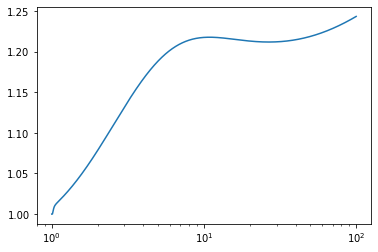

In [369]:
x = np.linspace(1,100,len(k))
plt.plot(x,k)
plt.xscale('log')
#plt.show()
#plt.plot(x,k)
#plt.show()
#plt.plot(x,np.exp(k))

fuck 100
fuck 1000
fuck 10000


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


fuck 100
fuck 1000
fuck 10000
fuck 100
fuck 1000
fuck 10000
fuck 100
fuck 1000
fuck 10000
fuck 100
fuck 1000
fuck 10000
fuck 100
fuck 1000
fuck 10000


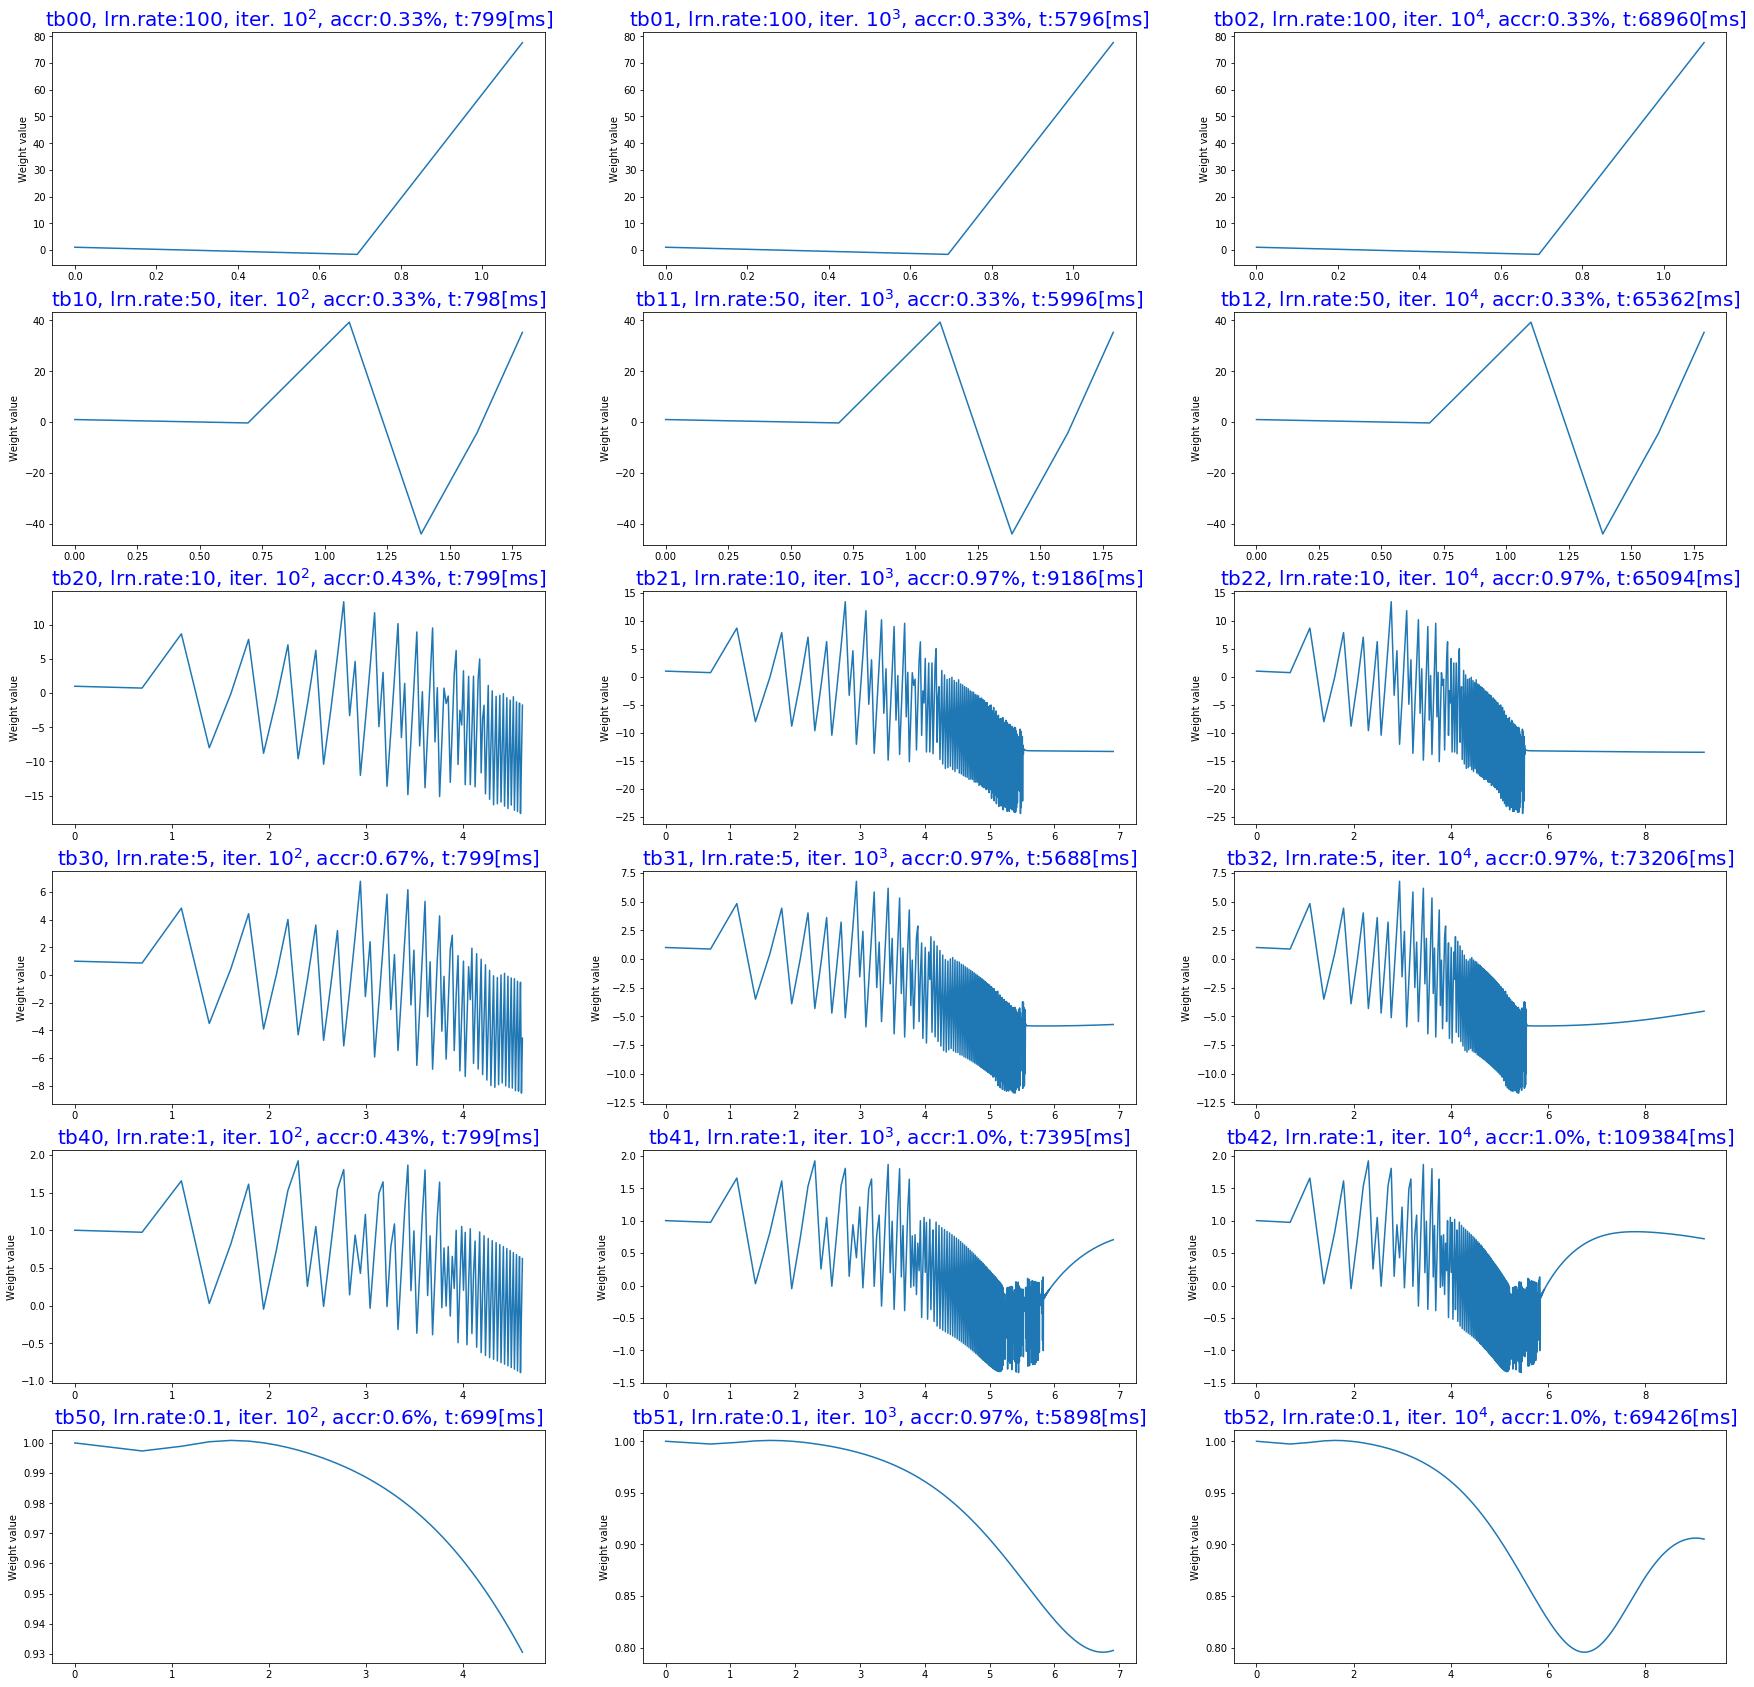

In [55]:
fig, axs = plt.subplots(6, 3,figsize=(30,30))     
i = -1
for learning_rate in (100,50,10,5,1,0.1):
    i+=1
    for j in range(3):
        r = j+2
        max_iter = 10**(r)  
        start = datetime.datetime.now()
        W,b,k = perform_gradient(X_train,y_train,max_iter=max_iter,learning_rate=learning_rate,debug_W=(0,1))
        y_predict = np.around(softmax(X_test,W,b),2)
        a = accuracy(y_test, y_predict)
        stop =  datetime.datetime.now()
        time = int((stop-start).total_seconds() * 100000)
        axs[i, j].set_title('tb{}{}, lrn.rate:{}, iter. $10^{} $, accr:{}%, t:{}[ms]'.format(i,j,np.round(learning_rate,2),r,np.round(a,2),time),size=20,color='blue')
        x = np.linspace(1,len(k),len(k))
        axs[i, j].plot(np.log(x),k)
      
for ax in axs.flat:
    ax.set( ylabel='Weight value')


 

fuck 10
fuck 100
fuck 1000
fuck 10000
fuck 10
fuck 100
fuck 1000
fuck 10000
fuck 10
fuck 100
fuck 1000
fuck 10000
fuck 10
fuck 100
fuck 1000
fuck 10000


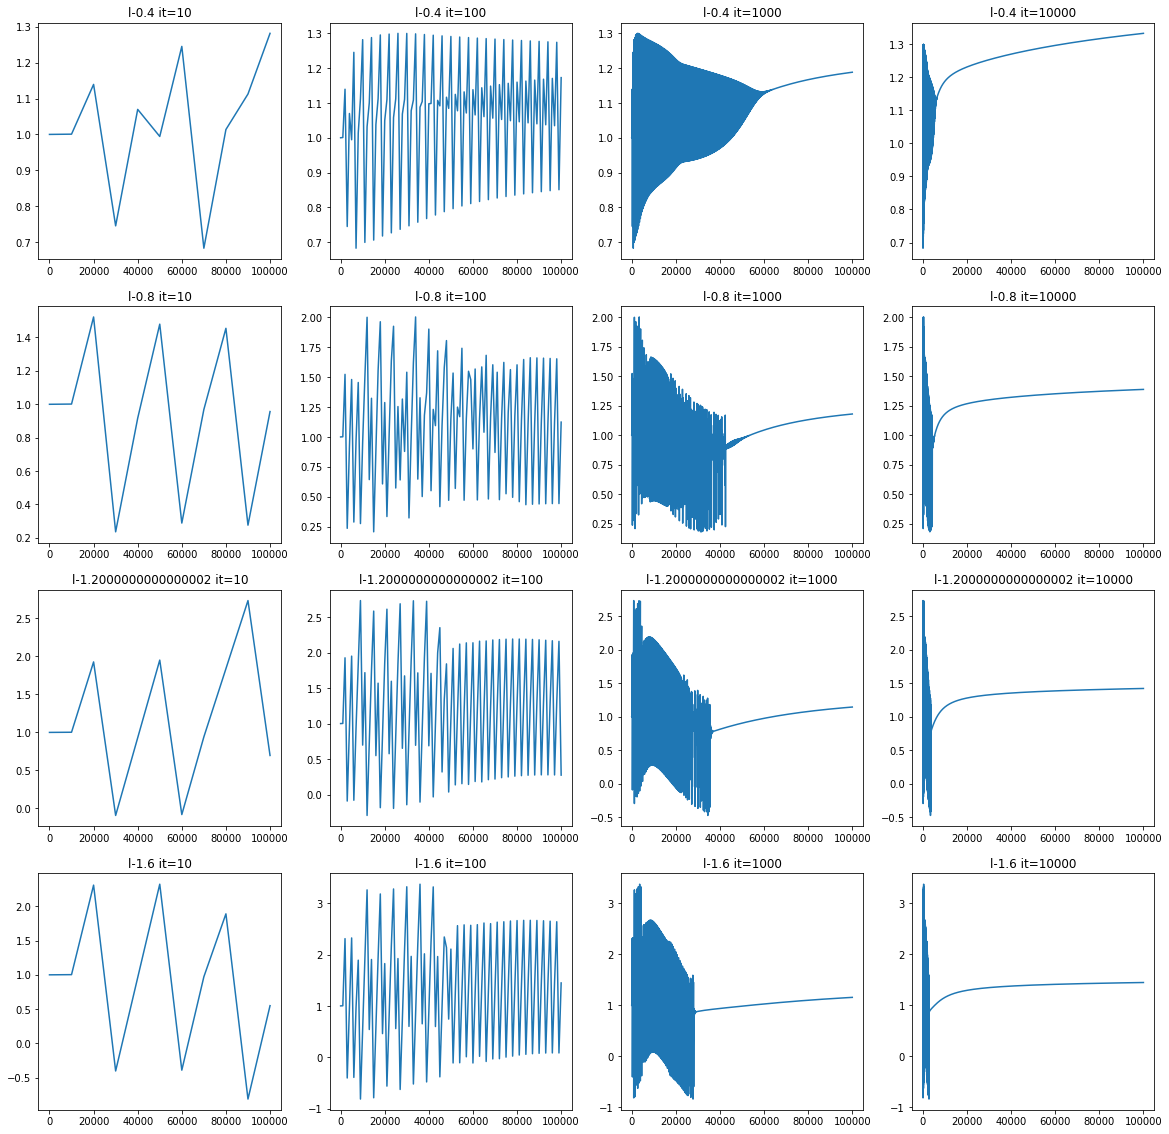

In [381]:
fig, axs = plt.subplots(4, 4,figsize=(20,20))        
for i in range(4):
    for j in range(4):
        learning_rate = 0.1*(i+1)*4
        max_iter = 10**(j+1)   
        W,b,k = perform_gradient(X_train,y_train,max_iter=max_iter,learning_rate=learning_rate,debug_W=(0,1))
        axs[i, j].set_title('l-{} it={}'.format(learning_rate,max_iter))
        x = np.linspace(1,100000,len(k))
        axs[i, j].plot(x,k)

fuck 10
fuck 100
fuck 1000
fuck 10000
fuck 10
fuck 100
fuck 1000
fuck 10000
fuck 10
fuck 100
fuck 1000
fuck 10000
fuck 10
fuck 100
fuck 1000
fuck 10000


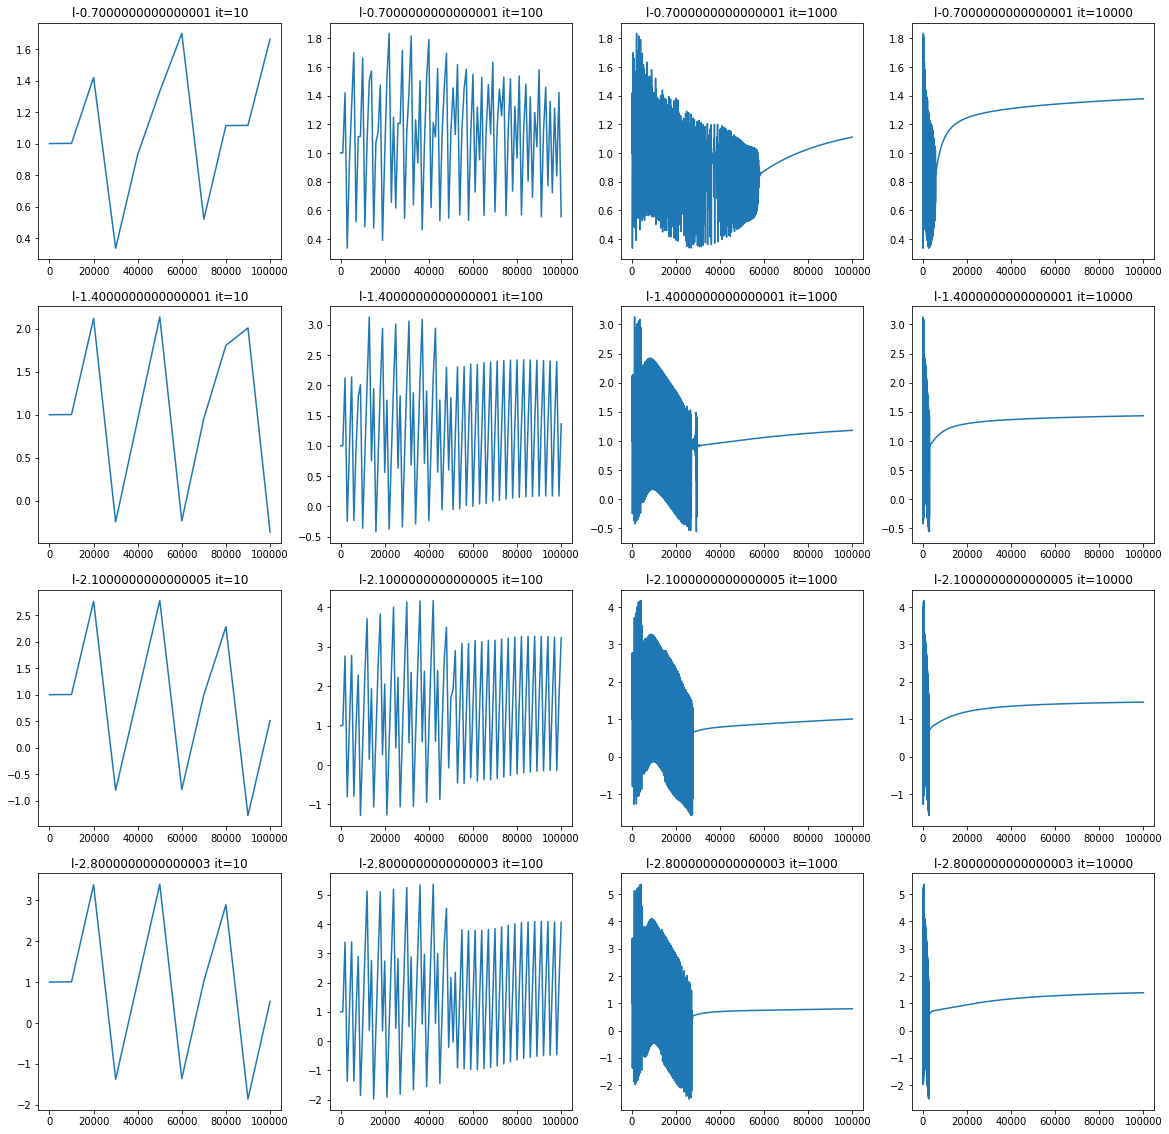

In [382]:

fig, axs = plt.subplots(4, 4,figsize=(20,20))        
for i in range(4):
    for j in range(4):
        learning_rate = 0.1*(i+1)*7
        max_iter = 10**(j+1)   
        W,b,k = perform_gradient(X_train,y_train,max_iter=max_iter,learning_rate=learning_rate,debug_W=(0,1))
        axs[i, j].set_title('l-{} it={}'.format(learning_rate,max_iter))
        x = np.linspace(1,100000,len(k))
        axs[i, j].plot(x,k)

In [398]:
W,b,k = perform_gradient(X_train,y_train,max_iter=10000,learning_rate=0.8,debug_W=(0,1))
print('original data label Y :  ')
print(y_train[1:20])
print('')
print("predicted data label Y' :")
print(np.around(softmax(X_train,W,b)[1:20],2))


fuck 10000
original data label Y :  
[[0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]]

predicted data label Y' :
[[0.   1.   0.  ]
 [0.01 0.   0.99]
 [0.98 0.   0.02]
 [0.99 0.01 0.  ]
 [0.01 0.   0.99]
 [0.99 0.   0.01]
 [0.98 0.   0.01]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.02 0.98 0.  ]
 [0.   0.   1.  ]
 [0.97 0.03 0.  ]
 [0.07 0.   0.93]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.97 0.   0.03]]


fuck 10
fuck 100
fuck 1000
fuck 10000
fuck 10
fuck 100
fuck 1000
fuck 10000
fuck 10
fuck 100
fuck 1000
fuck 10000
fuck 10
fuck 100
fuck 1000
fuck 10000


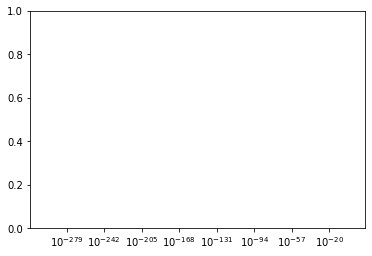

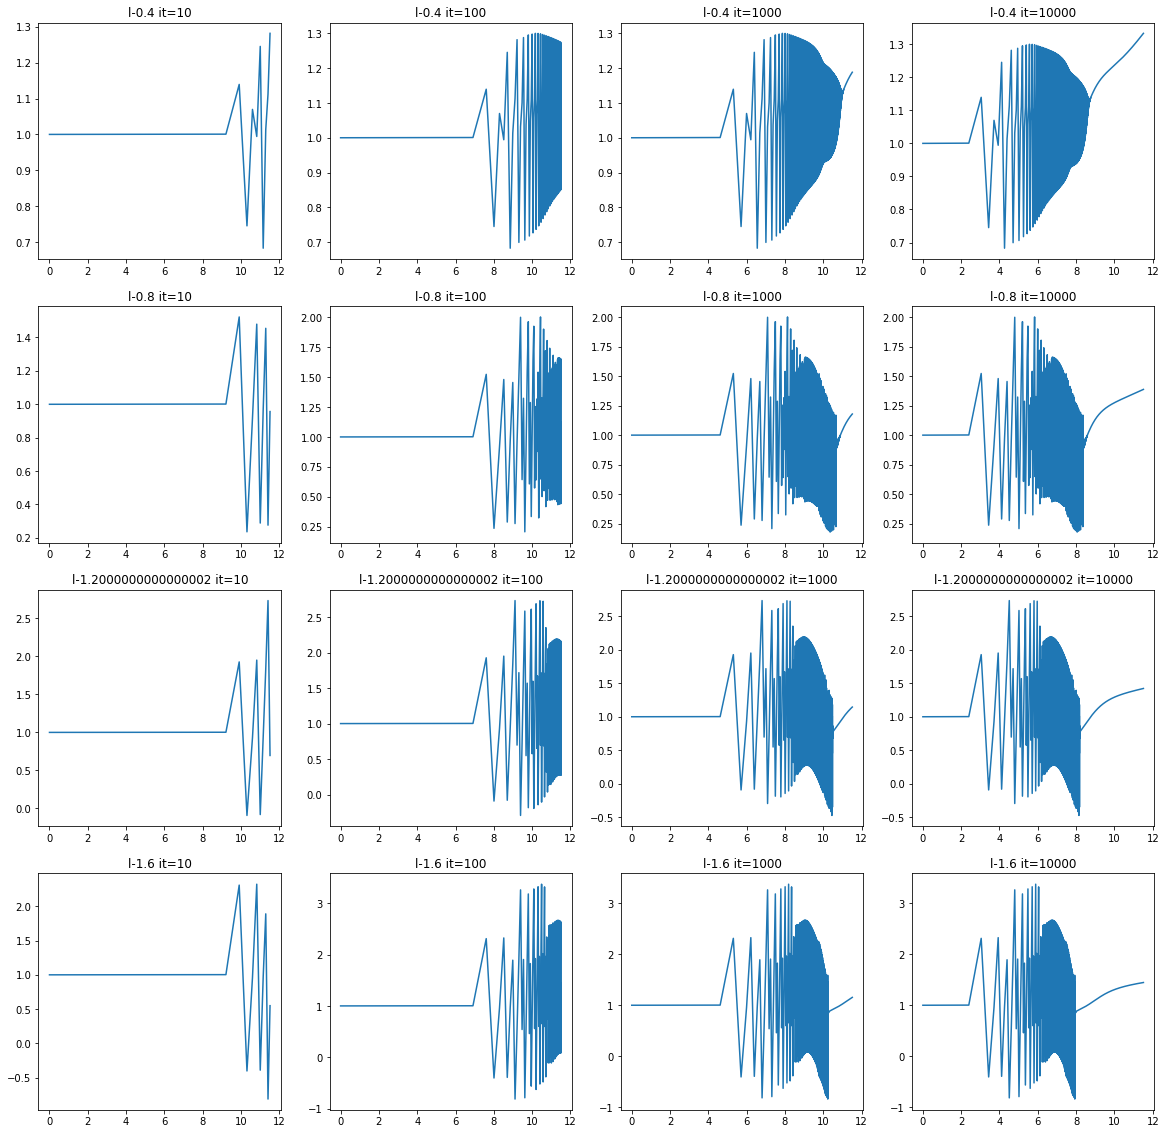

In [397]:
plt.xscale('log')
fig, axs = plt.subplots(4, 4,figsize=(20,20))        
for i in range(4):
    for j in range(4):
        learning_rate = 0.1*(i+1)*4
        max_iter = 10**(j+1)   
        W,b,k = perform_gradient(X_train,y_train,max_iter=max_iter,learning_rate=learning_rate,debug_W=(0,1))
        axs[i, j].set_title('l-{} it={}'.format(learning_rate,max_iter))
        x = np.linspace(1,100000,len(k))
        axs[i, j].plot(np.log(x),k)
        


In [17]:

*(4*np.tan(5)+np.tan(987))

-51.691028479795555

In [27]:
4*(1/np.tan((5/180)/np.pi))

452.3775528004404

In [28]:
1/np.tan((987/180)/np.pi)

-0.17639911390020027

In [30]:
orange = 5

krusha  = 2*orange**3 - orange-orange-1 
krusha

239

In [38]:
4*(  4/( np.tan(orange/180)*np.pi) ) - 1/(np.tan( (krusha/180)*np.pi) )

182.69847437670958